In [1]:
# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import wrangle
import pandas as pd
import numpy as np
import os

# Pre-processing Data
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

# Model
from sklearn.cluster import KMeans
import model

# Custom module
import util

In [2]:
# Combines get_food_data, first_row_to_col_head, drop_cols, and object_to_int functions to acquire and return a prepared dataframe.
df = wrangle.wrangle_food()
df.head(3)

,Food code,Main food description,WWEIA Category description,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g)
0,11000000,"Milk, human",Human milk,70.0,1.03,6.89,6.89,0.0,4.38,87.50
1,11100000,"Milk, NFS","Milk, reduced fat",51.0,3.34,4.87,4.89,0.0,1.99,89.04
2,11111000,"Milk, whole","Milk, whole",60.0,3.28,4.67,4.81,0.0,3.20,88.10


# Exploratory Analysis

#### What's the distribution for each of our variables?
- We show histogram plots for each column with integer values using default histogram settings  and when binned into 100 bins

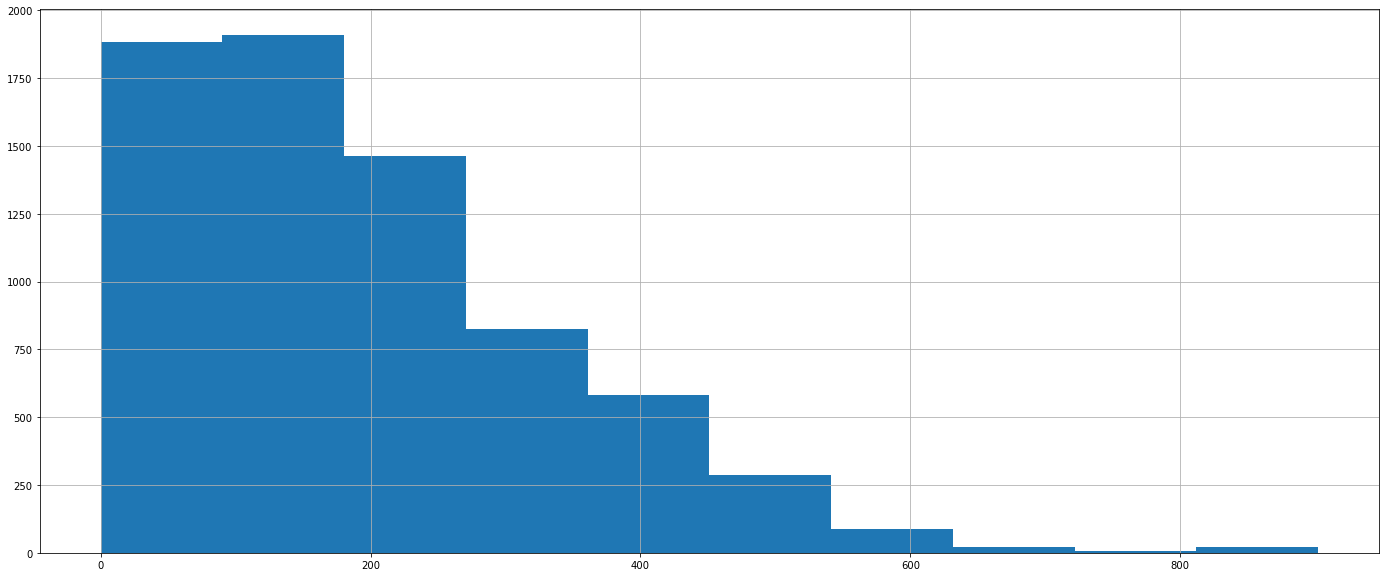

In [3]:
# Histogram of Energy
df['Energy (kcal)'].hist(figsize=(24, 10))
plt.show()

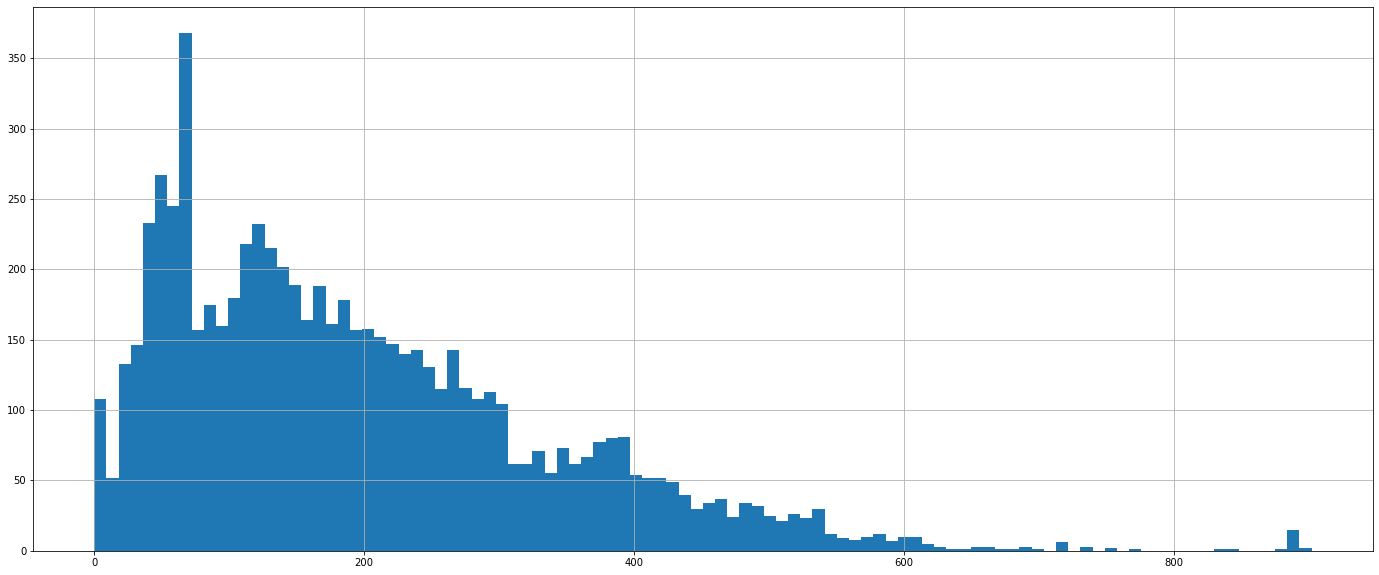

In [4]:
# Histogram of Energy divided into 100 bins
df['Energy (kcal)'].hist(figsize=(24, 10), bins=100)
plt.show()

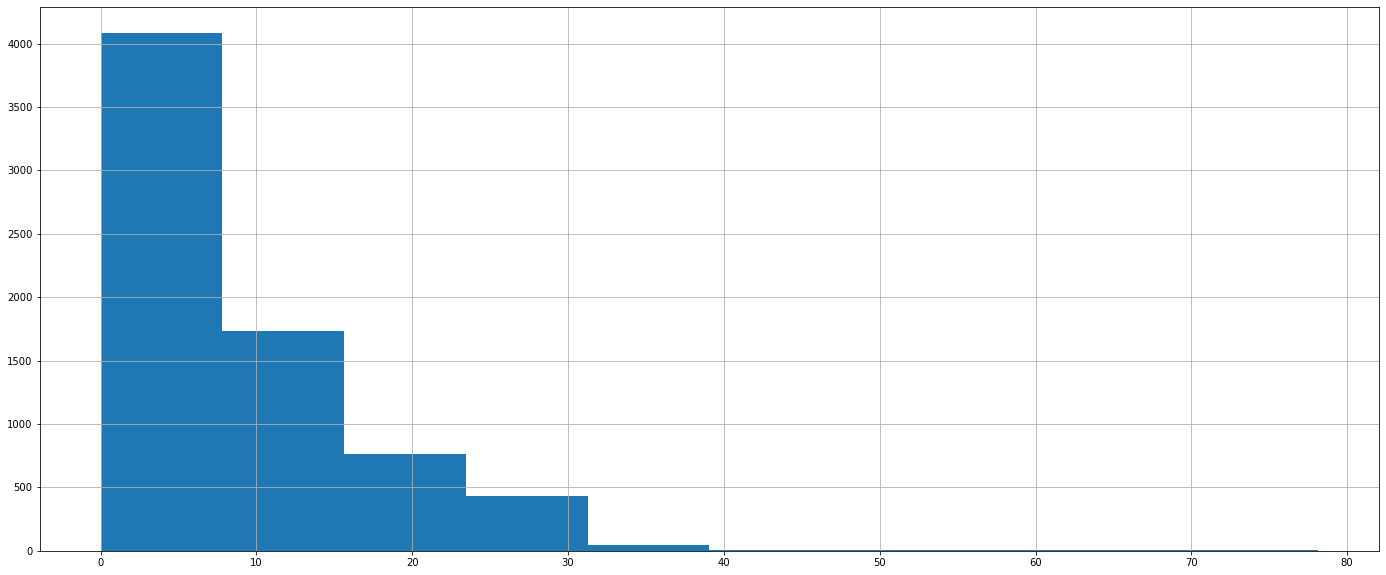

In [5]:
# Histogram of Protein divided
df['Protein (g)'].hist(figsize=(24, 10))
plt.show()

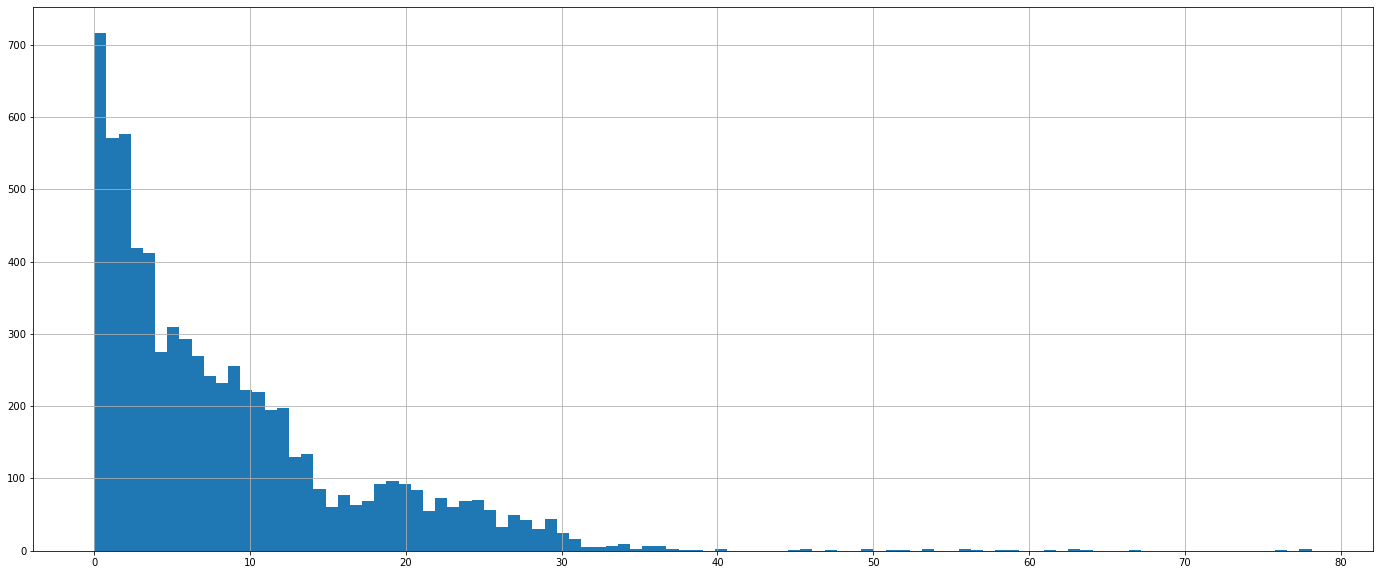

In [6]:
# Histogram of Protein divided into 100 bins
df['Protein (g)'].hist(figsize=(24, 10), bins=100)
plt.show()

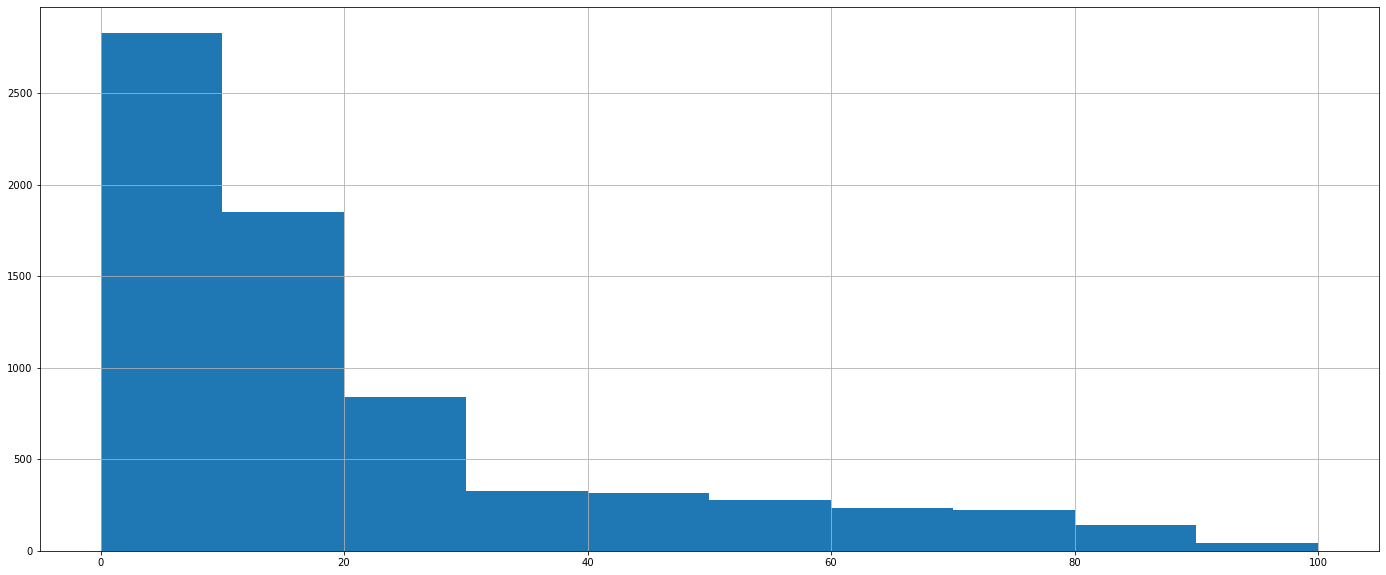

In [7]:
# Histogram of Carbohydrate divided
df['Carbohydrate (g)'].hist(figsize=(24, 10))
plt.show()

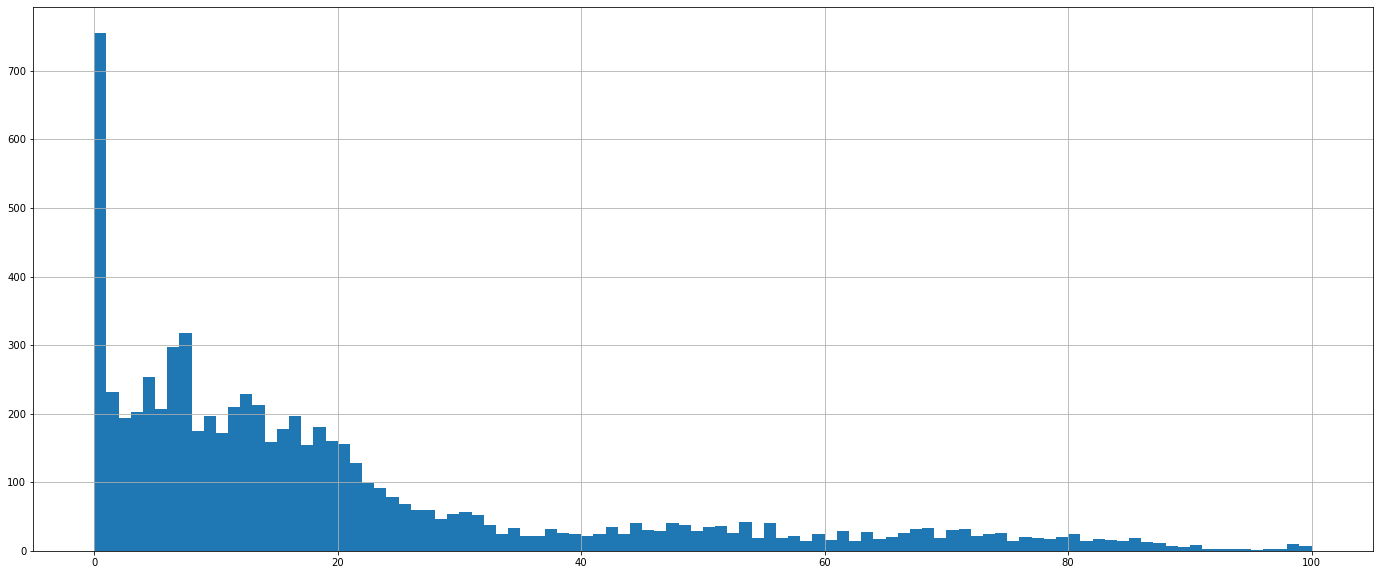

In [8]:
# Histogram of Carbohydrate divided into 100 bins
df['Carbohydrate (g)'].hist(figsize=(24, 10), bins=100)
plt.show()

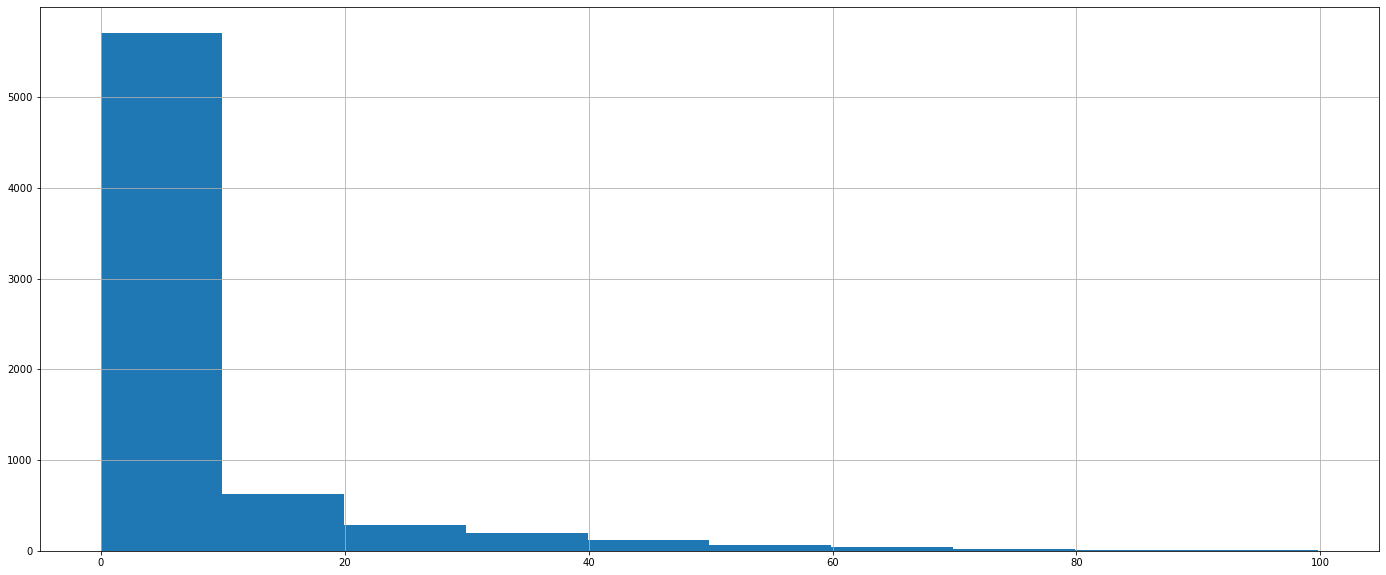

In [9]:
# Histogram of Sugars divided
df['Sugars, total\n(g)'].hist(figsize=(24, 10))
plt.show()

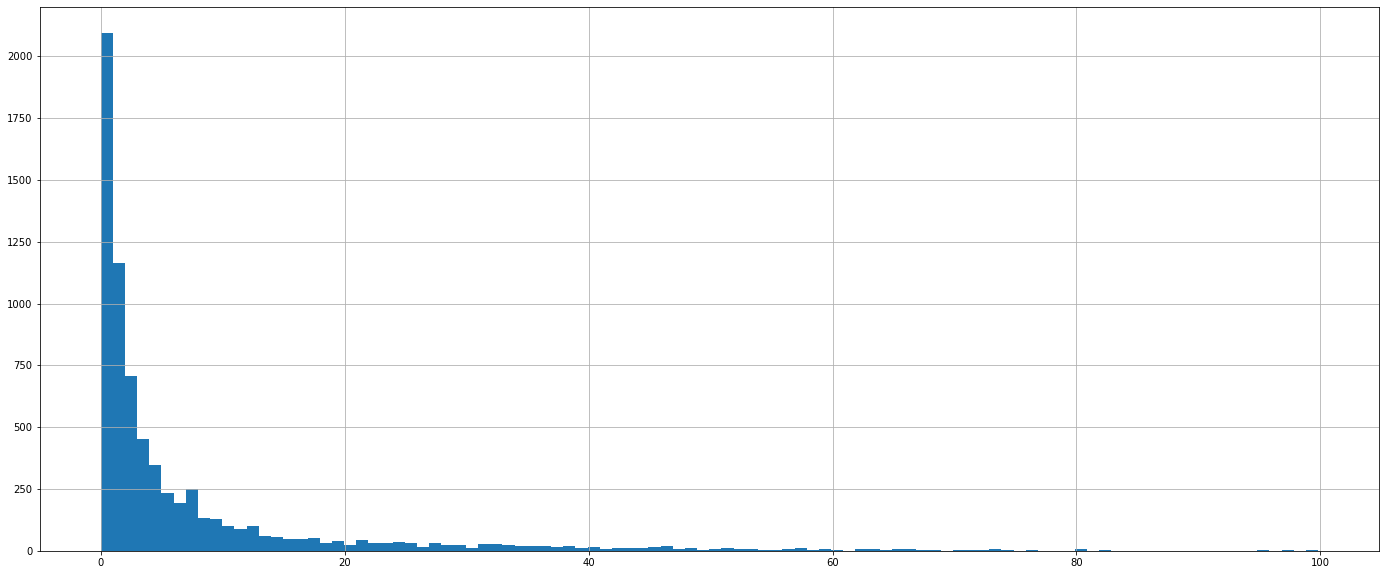

In [10]:
# Histogram of Sugars divided into 100 bins
df['Sugars, total\n(g)'].hist(figsize=(24, 10), bins=100)
plt.show()

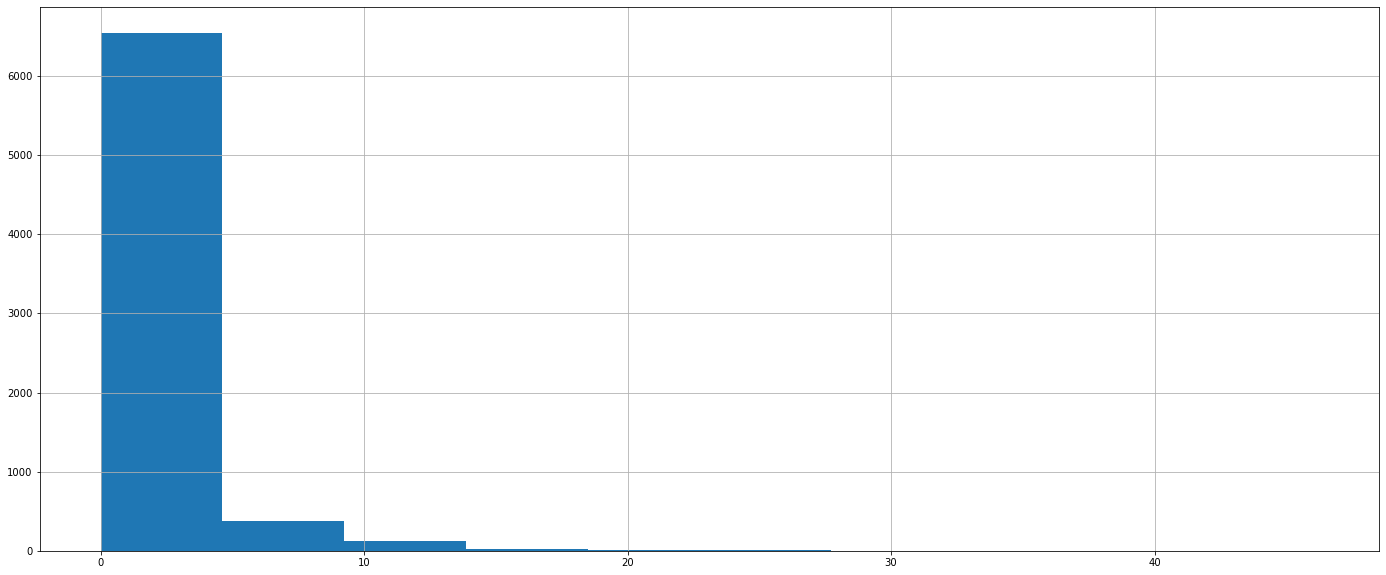

In [11]:
# Histogram of Fiber divided
df['Fiber, total dietary (g)'].hist(figsize=(24, 10))
plt.show()

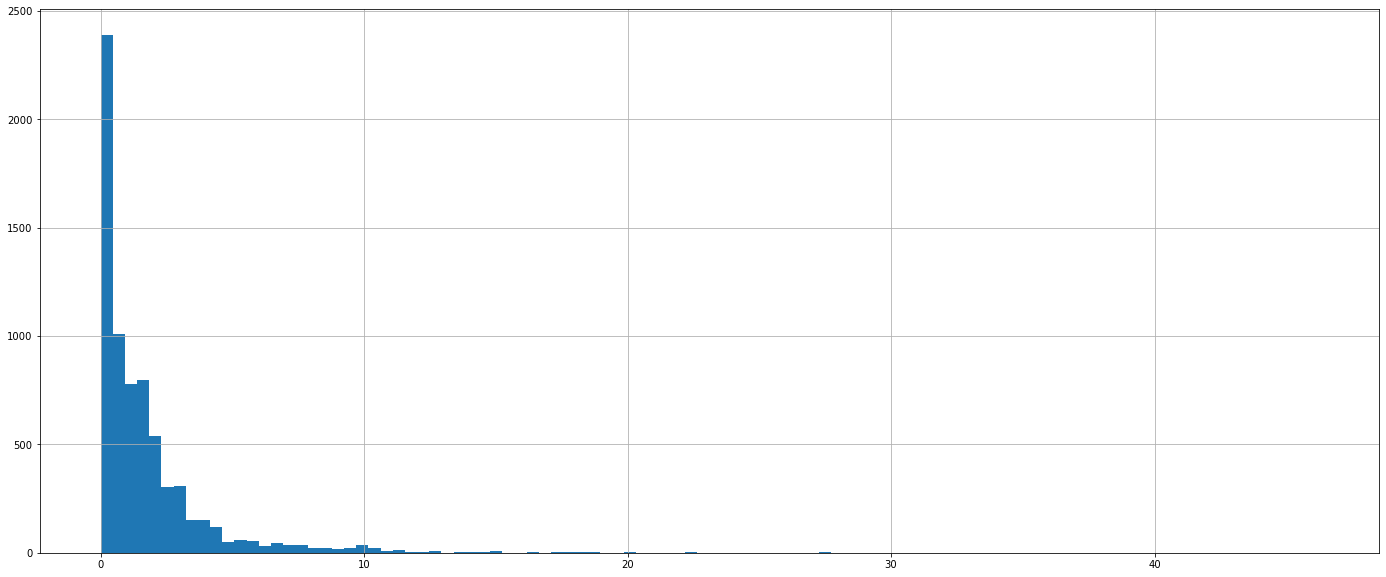

In [12]:
# Histogram of Fiber divided into 100 bins
df['Fiber, total dietary (g)'].hist(figsize=(24, 10), bins=100)
plt.show()

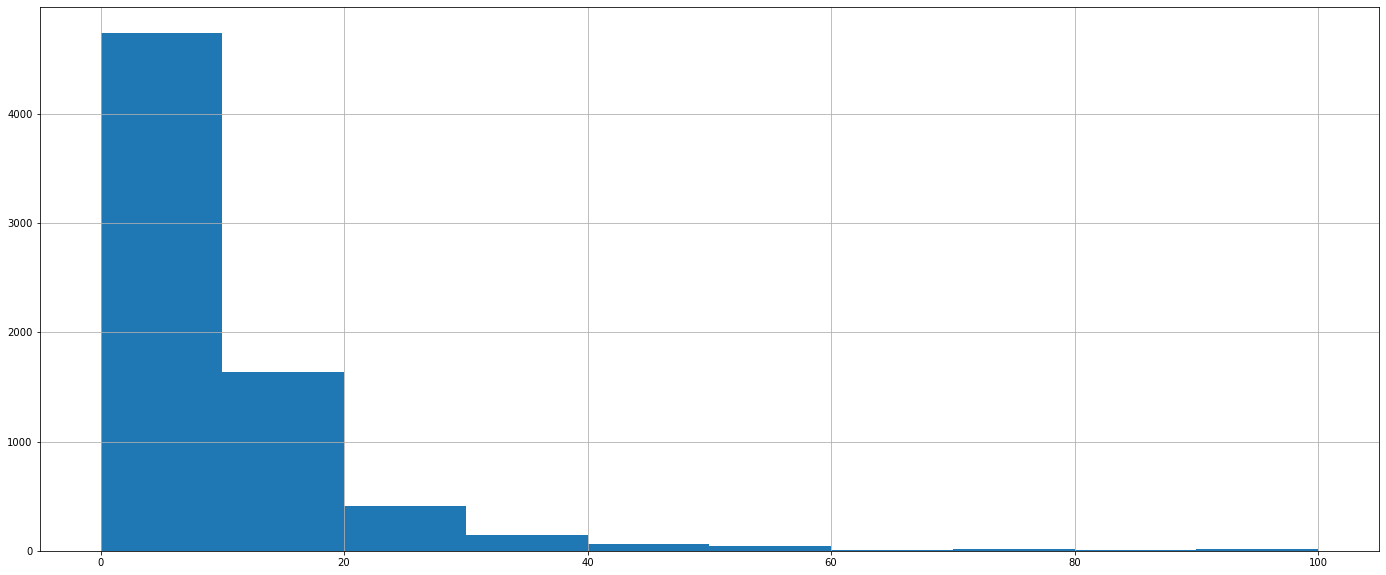

In [13]:
# Histogram of Fat divided
df['Total Fat (g)'].hist(figsize=(24, 10))
plt.show()

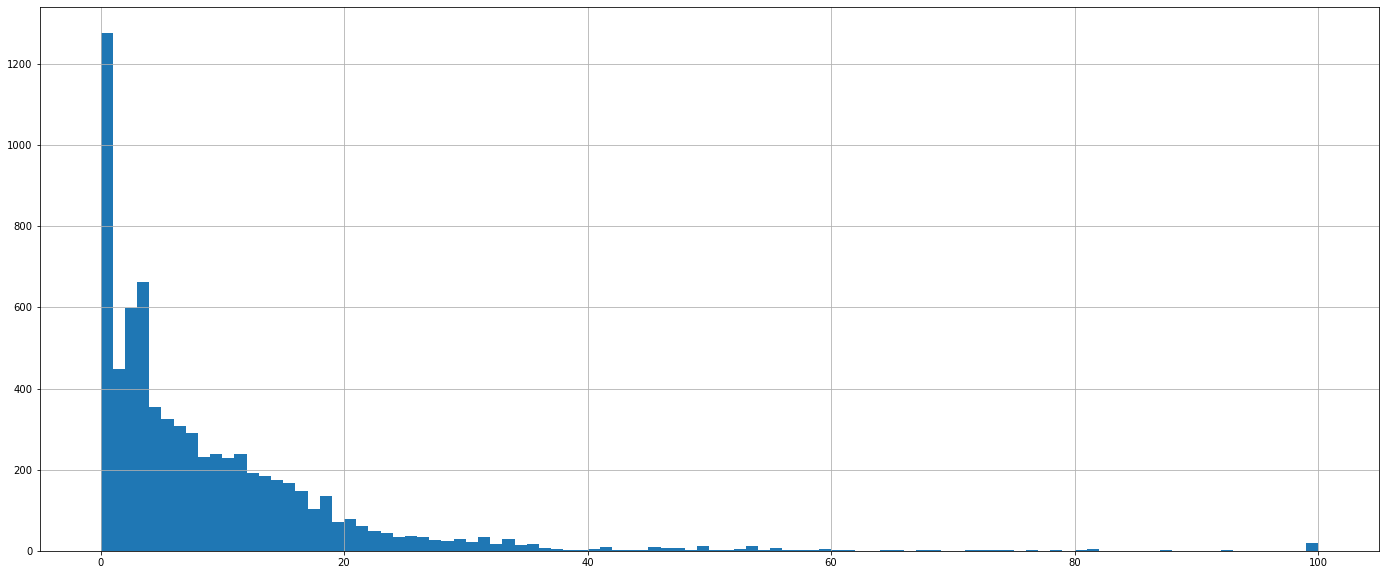

In [14]:
# Histogram of Fat divided
df['Total Fat (g)'].hist(figsize=(24, 10), bins=100)
plt.show()

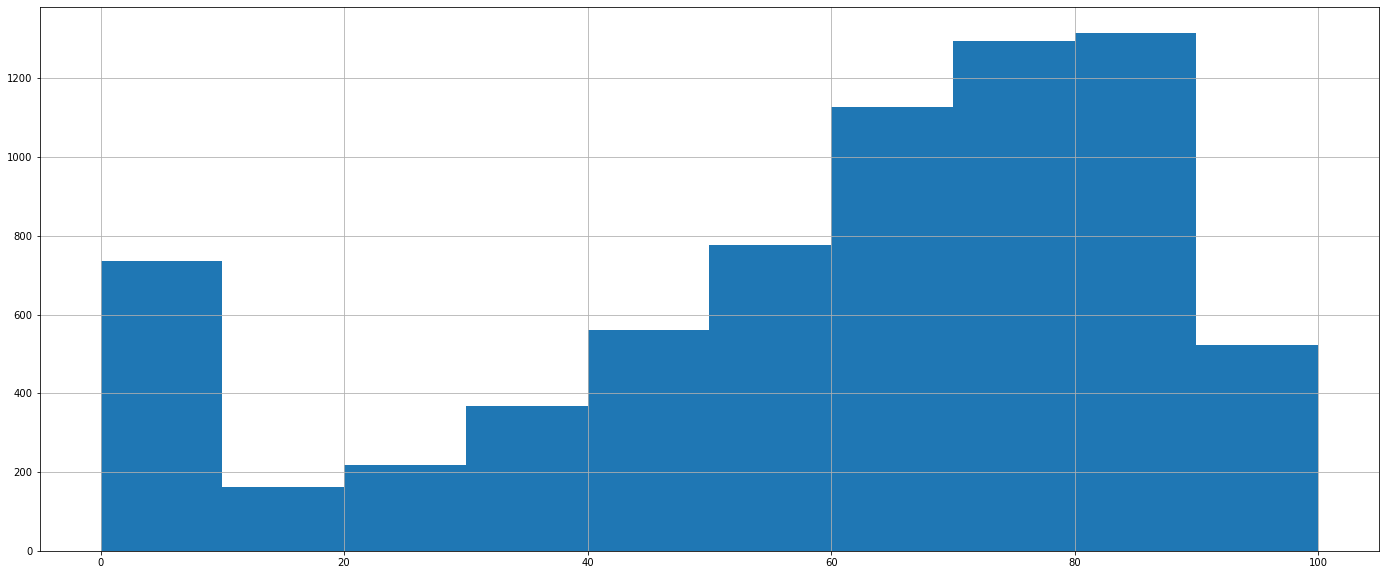

In [15]:
# Histogram of Water divided
df['Water\n(g)'].hist(figsize=(24, 10))
plt.show()

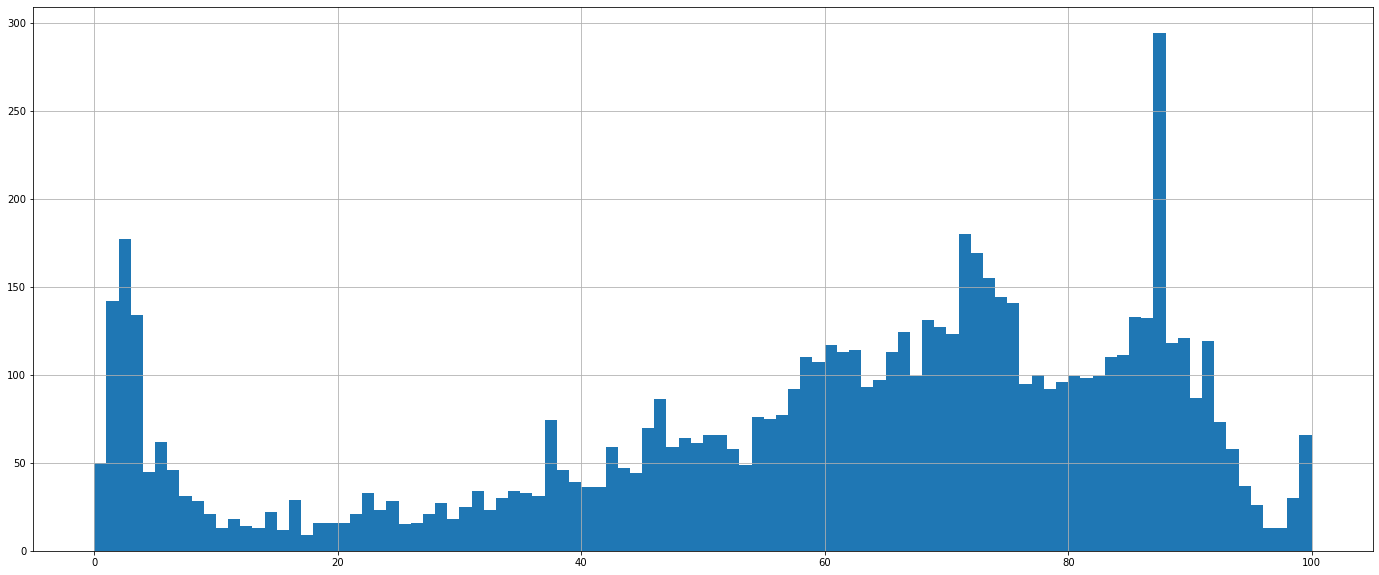

In [16]:
# Histogram of Water divided into 100 bins
df['Water\n(g)'].hist(figsize=(24, 10), bins=100)
plt.show()

**Checking for values that are too extreme**

In [17]:
food_types_and_nutrients = ['WWEIA Category description',
                            'Energy (kcal)', 
                            'Protein (g)', 
                            'Carbohydrate (g)', 
                            'Sugars, total\n(g)', 
                            'Fiber, total dietary (g)', 
                            'Total Fat (g)', 
                            'Water\n(g)']
# Looks like the central tendencies and 
food_types = df[food_types_and_nutrients].groupby("WWEIA Category description").agg(["min", "mean", "median", "std", "max"])
food_types.round(2)

0                               Energy (kcal)                                \
                                          min    mean median     std    max   
WWEIA Category description                                                    
Apple juice                              46.0   46.67   46.0    1.15   48.0   
Apples                                   42.0   82.29   68.0   33.71  134.0   
Baby food: cereals                       64.0  284.70  390.5  156.56  407.0   
Baby food: fruit                         37.0   58.96   60.0   16.16  109.0   
Baby food: meat and dinners              48.0   81.11   69.0   35.57  188.0   
...                                       ...     ...    ...     ...    ...   
White potatoes, baked or boiled          60.0  120.35  125.0   20.24  159.0   
Wine                                     49.0   91.08   84.0   34.28  160.0   
Yeast breads                             87.0  279.97  275.0   43.13  448.0   
Yogurt, Greek                            61.0   93.93   95.0   24.54  160.0   
Yogurt, regular                          56.0   72.12   72.0   10.89   89.0   

0                               Protein (g)                            ...  \
                                        min  mean median   std    max  ...   
WWEIA Category description                                             ...   
Apple juice                            0.10  0.11   0.10  0.01   0.12  ...   
Apples                                 0.10  0.36   0.17  0.44   1.34  ...   
Baby food: cereals                     0.71  5.88   6.66  3.97  13.20  ...   
Baby food: fruit                       0.00  0.38   0.30  0.31   1.10  ...   
Baby food: meat and dinners            1.11  5.56   3.40  4.67  14.60  ...   
...                                     ...   ...    ...   ...    ...  ...   
White potatoes, baked or boiled        1.34  2.39   1.95  0.84   4.69  ...   
Wine                                   0.00  0.16   0.07  0.16   0.50  ...   
Yeast breads                           3.48  9.63   9.43  2.19  16.94  ...   
Yogurt, Greek                          7.33  8.87   8.64  0.87  10.30  ...   
Yogurt, regular                        0.31  4.36   5.09  1.36   5.73  ...   

0                               Total Fat (g)                            \
                                          min  mean median   std    max   
WWEIA Category description                                                
Apple juice                              0.13  0.14   0.13  0.02   0.17   
Apples                                   0.10  0.84   0.17  1.22   3.04   
Baby food: cereals                       0.40  3.33   2.70  2.62   7.05   
Baby food: fruit                         0.00  0.14   0.15  0.11   0.37   
Baby food: meat and dinners              0.50  3.51   2.18  3.52  14.60   
...                                       ...   ...    ...   ...    ...   
White potatoes, baked or boiled          0.10  3.95   4.24  2.22   8.35   
Wine                                     0.00  0.02   0.00  0.03   0.08   
Yeast breads                             0.00  5.00   3.59  4.73  24.75   
Yogurt, Greek                            0.15  2.38   2.50  1.51   5.00   
Yogurt, regular                          0.17  1.61   1.51  1.03   3.50   

0                               Water\n(g)                              
                                       min   mean median    std    max  
WWEIA Category description                                              
Apple juice                          87.92  88.13  88.24   0.18  88.24  
Apples                               66.30  78.72  81.98   7.82  88.22  
Baby food: cereals                    1.00  31.33   5.26  37.93  84.77  
Baby food: fruit                     72.23  84.03  83.72   4.10  89.50  
Baby food: meat and dinners          68.30  83.58  85.05   4.98  89.10  
...                                    ...    ...    ...    ...    ...  
White potatoes, baked or boiled      68.04  72.69  72.09   2.97  83.97  
Wine               

## Summary
- Plotting each  column as a histogram shows that with the exception of water they are right-skewed
- None of the values found appear extreme enough to be excluded and may be important for differentiation 

## Statistical Test

### Splitting Data into train, validate, and test datasets and showing each ones size

In [18]:
# Split test off, 20% of original df size. 
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=42)

# Split validate off, 30% of what remains (24% of original df size)
# Thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=42)

print("train observations: ", train.size)
print("validate observations: ", validate.size)
print("test observations: ", test.size)


train observations:  39660
validate observations:  17000
test observations:  14170


Setting alpha to .05

In [19]:
α = .05

#### How strong are the relationships between each of the numerical variables?

$H_0$ = Null Hypothesis - There's a significant relationship between all the nutrition categories.

$H_A$ = Alternative Hypothesis - There's not a significant relationship between all the nutrition categories.

Relationship strength between each pair of numerical variables


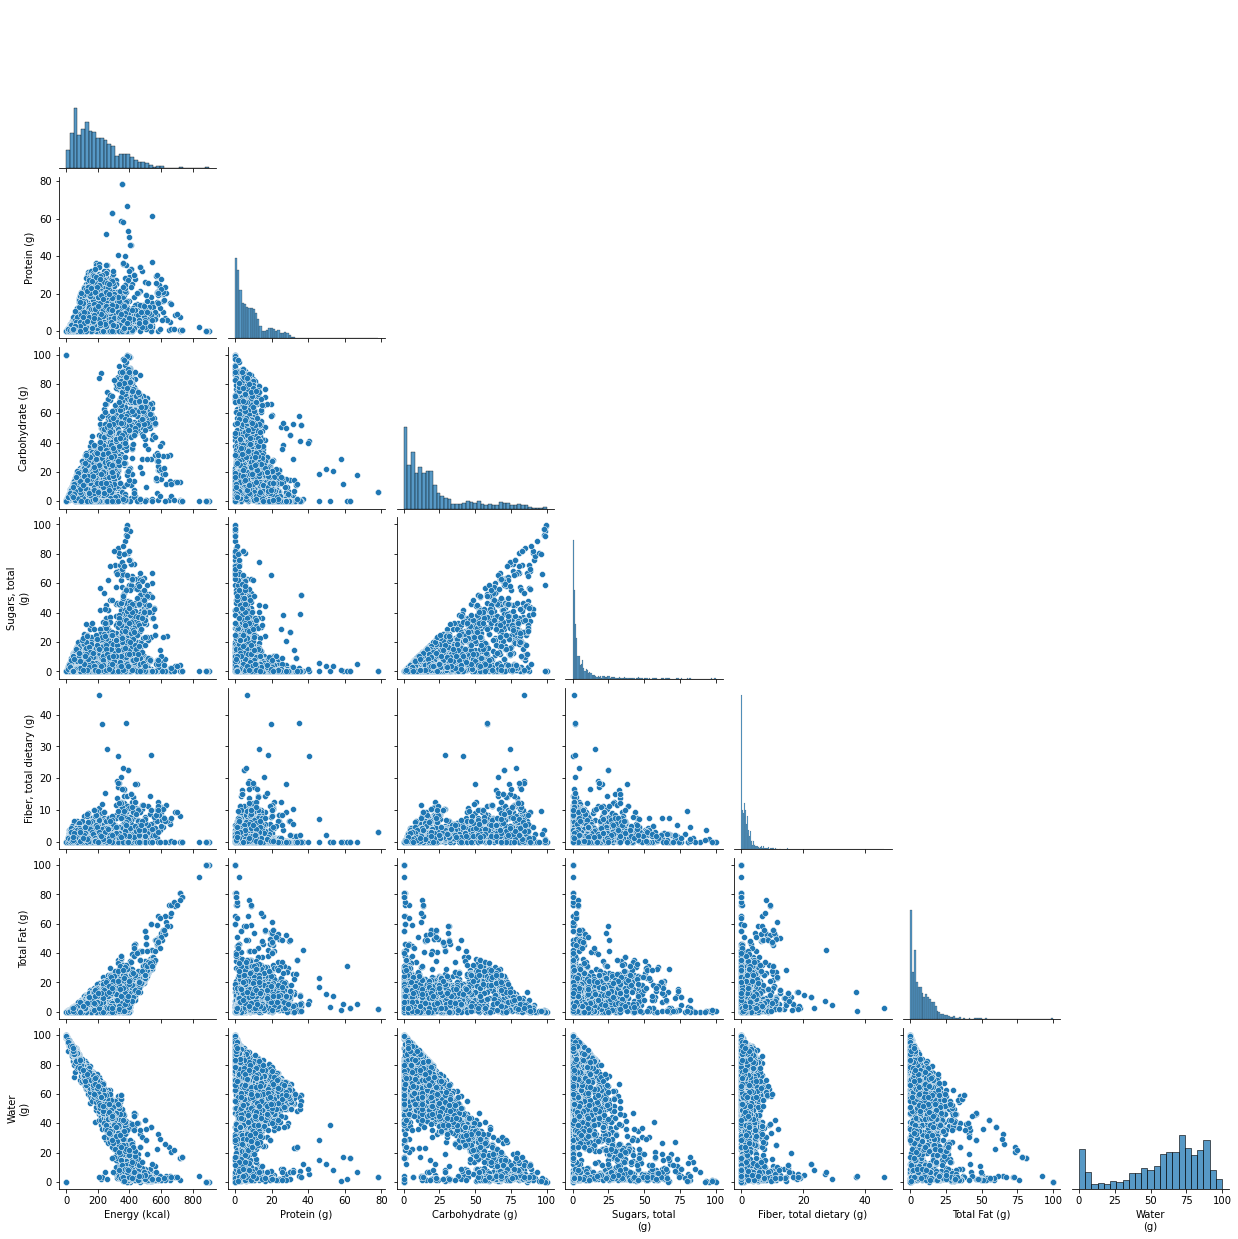

In [20]:
print("Relationship strength between each pair of numerical variables")
numerical_cols = ['Energy (kcal)', 
                  'Protein (g)', 
                  'Carbohydrate (g)', 
                  'Sugars, total\n(g)', 
                  'Fiber, total dietary (g)', 
                  'Total Fat (g)', 
                  'Water\n(g)']
sns.pairplot(train[numerical_cols], corner=True)
plt.show()

In [21]:
train.corr(method ='pearson')

,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g)
0,,,,,,,
Energy (kcal),1.000000,0.291216,0.609134,0.393966,0.334046,0.795103,-0.938103
Protein (g),0.291216,1.000000,-0.161689,-0.225185,-0.011715,0.210690,-0.280306
Carbohydrate (g),0.609134,-0.161689,1.000000,0.685414,0.489036,0.081682,-0.809627
"Sugars, total\n(g)",0.393966,-0.225185,0.685414,1.000000,0.131326,0.050997,-0.512421
"Fiber, total dietary (g)",0.334046,-0.011715,0.489036,0.131326,1.000000,0.112865,-0.451687
Total Fat (g),0.795103,0.210690,0.081682,0.050997,0.112865,1.000000,-0.554528
Water\n(g),-0.938103,-0.280306,-0.809627,-0.512421,-0.451687,-0.554528,1.000000


In [22]:
train_corr = pd.DataFrame() # Correlation matrix
train_p = pd.DataFrame()  # Matrix of p-values
for x in train[numerical_cols].columns:
    for y in train[numerical_cols].columns:
        corr = stats.pearsonr(train[x], train[y])
        train_corr.loc[x,y] = corr[0]
        train_p.loc[x,y] = corr[1]

In [23]:
train_corr

,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g)
Energy (kcal),1.000000,0.291216,0.609134,0.393966,0.334046,0.795103,-0.938103
Protein (g),0.291216,1.000000,-0.161689,-0.225185,-0.011715,0.210690,-0.280306
Carbohydrate (g),0.609134,-0.161689,1.000000,0.685414,0.489036,0.081682,-0.809627
"Sugars, total\n(g)",0.393966,-0.225185,0.685414,1.000000,0.131326,0.050997,-0.512421
"Fiber, total dietary (g)",0.334046,-0.011715,0.489036,0.131326,1.000000,0.112865,-0.451687
Total Fat (g),0.795103,0.210690,0.081682,0.050997,0.112865,1.000000,-0.554528
Water\n(g),-0.938103,-0.280306,-0.809627,-0.512421,-0.451687,-0.554528,1.000000


Table showing variables with at least weak correlations in train

In [24]:
# returns boolean for absolute value greater than .25
abs(train_corr) > .25

,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g)
Energy (kcal),True,True,True,True,True,True,True
Protein (g),True,True,False,False,False,False,True
Carbohydrate (g),True,False,True,True,True,False,True
"Sugars, total\n(g)",True,False,True,True,False,False,True
"Fiber, total dietary (g)",True,False,True,False,True,False,True
Total Fat (g),True,False,False,False,False,True,True
Water\n(g),True,True,True,True,True,True,True


Table showing variables with strong correlations in train

In [25]:
# returns boolean for absolute value greater than .75
abs(train_corr) > .75

,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g)
Energy (kcal),True,False,False,False,False,True,True
Protein (g),False,True,False,False,False,False,False
Carbohydrate (g),False,False,True,False,False,False,True
"Sugars, total\n(g)",False,False,False,True,False,False,False
"Fiber, total dietary (g)",False,False,False,False,True,False,False
Total Fat (g),True,False,False,False,False,True,False
Water\n(g),True,False,True,False,False,False,True


Table showing the p-values for variables in train

In [26]:
train_p

,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g)
Energy (kcal),0.000000e+00,2.267938e-78,0.000000e+00,2.105170e-147,5.408564e-104,0.000000e+00,0.000000e+00
Protein (g),2.267938e-78,0.000000e+00,1.222562e-24,9.008315e-47,4.607750e-01,4.931204e-41,1.648397e-72
Carbohydrate (g),0.000000e+00,1.222562e-24,0.000000e+00,0.000000e+00,1.381373e-237,2.591273e-07,0.000000e+00
"Sugars, total\n(g)",2.105170e-147,9.008315e-47,0.000000e+00,0.000000e+00,1.008247e-16,1.314964e-03,1.621350e-264
"Fiber, total dietary (g)",5.408564e-104,4.607750e-01,1.381373e-237,1.008247e-16,0.000000e+00,1.015620e-12,1.083497e-198
Total Fat (g),0.000000e+00,4.931204e-41,2.591273e-07,1.314964e-03,1.015620e-12,0.000000e+00,1.174028e-318
Water\n(g),0.000000e+00,1.648397e-72,0.000000e+00,1.621350e-264,1.083497e-198,1.174028e-318,0.000000e+00


Table showing p-values greater than alpha

In [27]:
# Shows boolean answers for train_p less than .05
train_p < α

,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g)
Energy (kcal),True,True,True,True,True,True,True
Protein (g),True,True,True,True,False,True,True
Carbohydrate (g),True,True,True,True,True,True,True
"Sugars, total\n(g)",True,True,True,True,True,True,True
"Fiber, total dietary (g)",True,False,True,True,True,True,True
Total Fat (g),True,True,True,True,True,True,True
Water\n(g),True,True,True,True,True,True,True


Table showing where there are statistically signifcant correlations that are at least weakly correllated.

In [28]:
# Returns boolean answers where both train_corr is greater than .25 and train_p
# is less than alpha
(abs(train_corr) > .25) & (train_p < α)

,Energy (kcal),Protein (g),Carbohydrate (g),"Sugars, total\n(g)","Fiber, total dietary (g)",Total Fat (g),Water\n(g)
Energy (kcal),True,True,True,True,True,True,True
Protein (g),True,True,False,False,False,False,True
Carbohydrate (g),True,False,True,True,True,False,True
"Sugars, total\n(g)",True,False,True,True,False,False,True
"Fiber, total dietary (g)",True,False,True,False,True,False,True
Total Fat (g),True,False,False,False,False,True,True
Water\n(g),True,True,True,True,True,True,True


### Summary
Most values have at least a weak statisticaly significant correlation except for the following combinations which reject the Null Hypothesis:
- Protein & Carbohydrate
- Protein & Sugars
- Protein & Fiber
- Protein & Total Fat
- Carbohydrate & Total Fat
- Sugars & Fiber
- Sugars & Total Fat
- Fiber & Total Fat